In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pickle

In [ ]:


from src.utils.logger import Logging
from src.nn.DVPDESolver import DVPDESolver
from src.nn.CVPDESolver import CVPDESolver
from src.nn.ClassicalSolver import ClassicalSolver
from src.nn.pde import wave_operator
from src.utils.plot_prediction import plt_prediction
from src.data.wave_dataset import u, r
from src.data.wave_dataset import Sampler


os.environ['CUDA_VISIBLE_DEVICES'] = '-1'    # for no GPUs


In [ ]:

DEVICE = "cpu"

mode = "hybrid"
num_qubits = 5
output_dim = 1
input_dim = 2
hidden_dim = 50
num_quantum_layers = 1
cutoff_dim = 10
classic_network = [input_dim, hidden_dim, output_dim]



args = {
    "batch_size": 64,
    "epochs": 20000,
    "lr": 0.0001,
    "seed": 1,
    "print_every": 5000,
    "log_path": "./checkpoints/helmholtz",
    "input_dim": input_dim,
    "output_dim": output_dim,
    "num_qubits": num_qubits,
    "hidden_dim": hidden_dim,
    "num_quantum_layers": num_quantum_layers,
    "classic_network": classic_network,
    "q_ansatz": "sim_circ_19",  # options: "alternating_layer_tdcnot", "abbas" , farhi , sim_circ_13_half, sim_circ_13 , sim_circ_14_half, sim_circ_14 , sim_circ_15 ,sim_circ_19
    "mode": mode,
    "activation": "tanh",  # options: "null", "partial_measurement_half" , partial_measurement_x
    "shots": None,  # Analytical gradients enabled
    "problem": "helmholtz",
    "solver": "Classical",  # options : "CV", "Classical", "DV"
    "device": DEVICE,
    "method": "None",
    "cutoff_dim": cutoff_dim,  # num_qubits >= cutoff_dim
    "class": "Classical",  # options : "DVQuantumLayer", GSRandomCVQNN , "CVQuantumLayer", "Enhanced_CVQuantumLayer"
    "encoding": "Classical", # options angle , amplitude
}



In [5]:
log_path = args["log_path"]
logger = Logging(log_path)

In [6]:

if args["solver"] == "CV":
    model = CVPDESolver(args, logger, DEVICE)
    model.logger.print("Using CV Solver")
elif args["solver"] == "Classical":
    model = Classical_Solver(args, logger, DEVICE)
    model.logger.print("Using Classical Solver")
else:
    model = DVPDESolver(args, logger, DEVICE)
    model.logger.print("Using DV Solver")
# Training loop
model.logger.print(f"The settings used:")
for key, value in args.items():
    model.logger.print(f"{key} : {value}")



INFO:src.utils.logger:checkpoint path: self.log_path='./checkpoints/helmholtz/2025-02-20_19-34-04-570809'
INFO:src.utils.logger:Using Classical Solver
INFO:src.utils.logger:The settings used:
INFO:src.utils.logger:batch_size : 64
INFO:src.utils.logger:epochs : 20000
INFO:src.utils.logger:lr : 0.0001
INFO:src.utils.logger:seed : 1
INFO:src.utils.logger:print_every : 100
INFO:src.utils.logger:log_path : ./checkpoints/helmholtz
INFO:src.utils.logger:input_dim : 2
INFO:src.utils.logger:output_dim : 1
INFO:src.utils.logger:num_qubits : 5
INFO:src.utils.logger:hidden_dim : 50
INFO:src.utils.logger:num_quantum_layers : 1
INFO:src.utils.logger:classic_network : [2, 50, 1]
INFO:src.utils.logger:q_ansatz : sim_circ_19
INFO:src.utils.logger:mode : hybrid
INFO:src.utils.logger:activation : tanh
INFO:src.utils.logger:shots : None
INFO:src.utils.logger:problem : helmholtz
INFO:src.utils.logger:solver : Classical
INFO:src.utils.logger:device : cpu
INFO:src.utils.logger:method : None
INFO:src.utils.lo

In [7]:
wave_train.train(model)


INFO:src.utils.logger:It: 0, Loss: 7.045e+00, Loss_res: 1.692e-04,  Loss_bcs: 7.045e-01, Loss_ut_ics: 2.899e-04, lr: 5.000e-03, Time: 0.01
INFO:src.utils.logger:Model state saved to ./checkpoints/helmholtz/2025-02-20_19-34-04-570809/model.pth


INFO:src.utils.logger:It: 100, Loss: 2.962e+00, Loss_res: 3.361e-01,  Loss_bcs: 2.919e-01, Loss_ut_ics: 5.252e-01, lr: 5.000e-03, Time: 0.79
INFO:src.utils.logger:Model state saved to ./checkpoints/helmholtz/2025-02-20_19-34-04-570809/model.pth
INFO:src.utils.logger:It: 200, Loss: 2.372e+00, Loss_res: 2.327e+00,  Loss_bcs: 2.176e-01, Loss_ut_ics: 1.605e+00, lr: 5.000e-03, Time: 1.46
INFO:src.utils.logger:Model state saved to ./checkpoints/helmholtz/2025-02-20_19-34-04-570809/model.pth
INFO:src.utils.logger:It: 300, Loss: 1.628e+00, Loss_res: 1.183e+00,  Loss_bcs: 1.477e-01, Loss_ut_ics: 1.849e+00, lr: 5.000e-03, Time: 2.21
INFO:src.utils.logger:Model state saved to ./checkpoints/helmholtz/2025-02-20_19-34-04-570809/model.pth
INFO:src.utils.logger:It: 400, Loss: 2.015e+00, Loss_res: 1.461e+00,  Loss_bcs: 1.890e-01, Loss_ut_ics: 1.039e+00, lr: 5.000e-03, Time: 2.81
INFO:src.utils.logger:Model state saved to ./checkpoints/helmholtz/2025-02-20_19-34-04-570809/model.pth
INFO:src.utils.logge

In [12]:

# Print total number of parameters
total_params = sum(p.numel() for p in model.parameters())
model.logger.print(f"Total number of parameters: {total_params}")


INFO:src.utils.logger:Total number of parameters: 2751


## Plot loss history

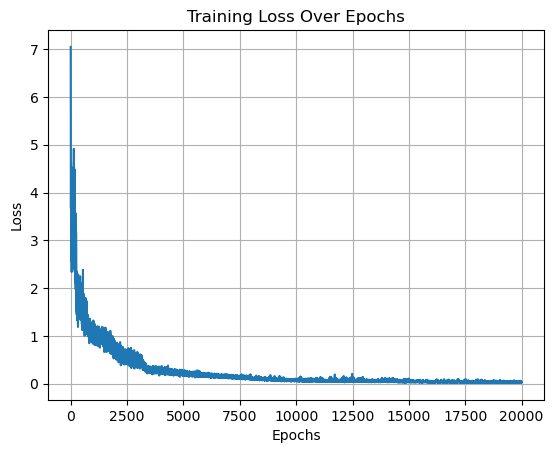

INFO:src.utils.logger:final loss: 0.0320066437125206


In [11]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid()

file_path = os.path.join(model.log_path, "loss_history.pdf")
plt.savefig(file_path, bbox_inches="tight")
plt.show()

plt.close(
    "all",
)

model.logger.print(f"final loss: {model.loss_history[-1]}")

# Testing


In [9]:


DEVICE = 'cpu'
# Define PINN model
a = torch.tensor(0.7, dtype=torch.float32, device=DEVICE)
c = torch.tensor(2.0, dtype=torch.float32, device=DEVICE)

kernel_size = 300

dom_coords = np.array([[0.0, 0.0], [1.0, 1.0]], dtype=np.float32)



# Create mesh grid with float32
nn = 200
t = np.linspace(dom_coords[0, 0], dom_coords[1, 0], nn, dtype=np.float32)[:, None]
x = np.linspace(dom_coords[0, 1], dom_coords[1, 1], nn, dtype=np.float32)[:, None]
t, x = np.meshgrid(t, x)

# Convert to PyTorch tensor with float32
X_star = torch.hstack((
    torch.from_numpy(t.flatten()[:, None]), 
    torch.from_numpy(x.flatten()[:, None])
)).to(DEVICE).to(torch.float32)

u_star = u(X_star, a, c)
f_star = r(X_star, a, c)

# Predictions
u_pred_star, f_pred_star = wave_operator(model, X_star[:, 0:1], X_star[:, 1:2])

u_pred = u_pred_star.cpu().detach().numpy()
f_pred = f_pred_star.cpu().detach().numpy()
u_star = u_star.cpu().detach().numpy()
f_star = f_star.cpu().detach().numpy()
X = X_star.cpu().detach().numpy()


# Relative L2 error
error_u = np.linalg.norm(u_pred - u_star) / np.linalg.norm(u_star) * 100
error_f = np.linalg.norm(f_pred - f_star) / np.linalg.norm(f_star) * 100

logger.print("Relative L2 error_u: {:.2e}".format(error_u))
logger.print("Relative L2 error_f: {:.2e}".format(error_f))




/tmp/ipykernel_3746243/2554636317.py:39: RuntimeWarning: divide by zero encountered in float_scalars
  error_f = np.linalg.norm(f_pred - f_star) / np.linalg.norm(f_star) * 100
INFO:src.utils.logger:Relative L2 error_u: 2.33e+01
INFO:src.utils.logger:Relative L2 error_f: inf


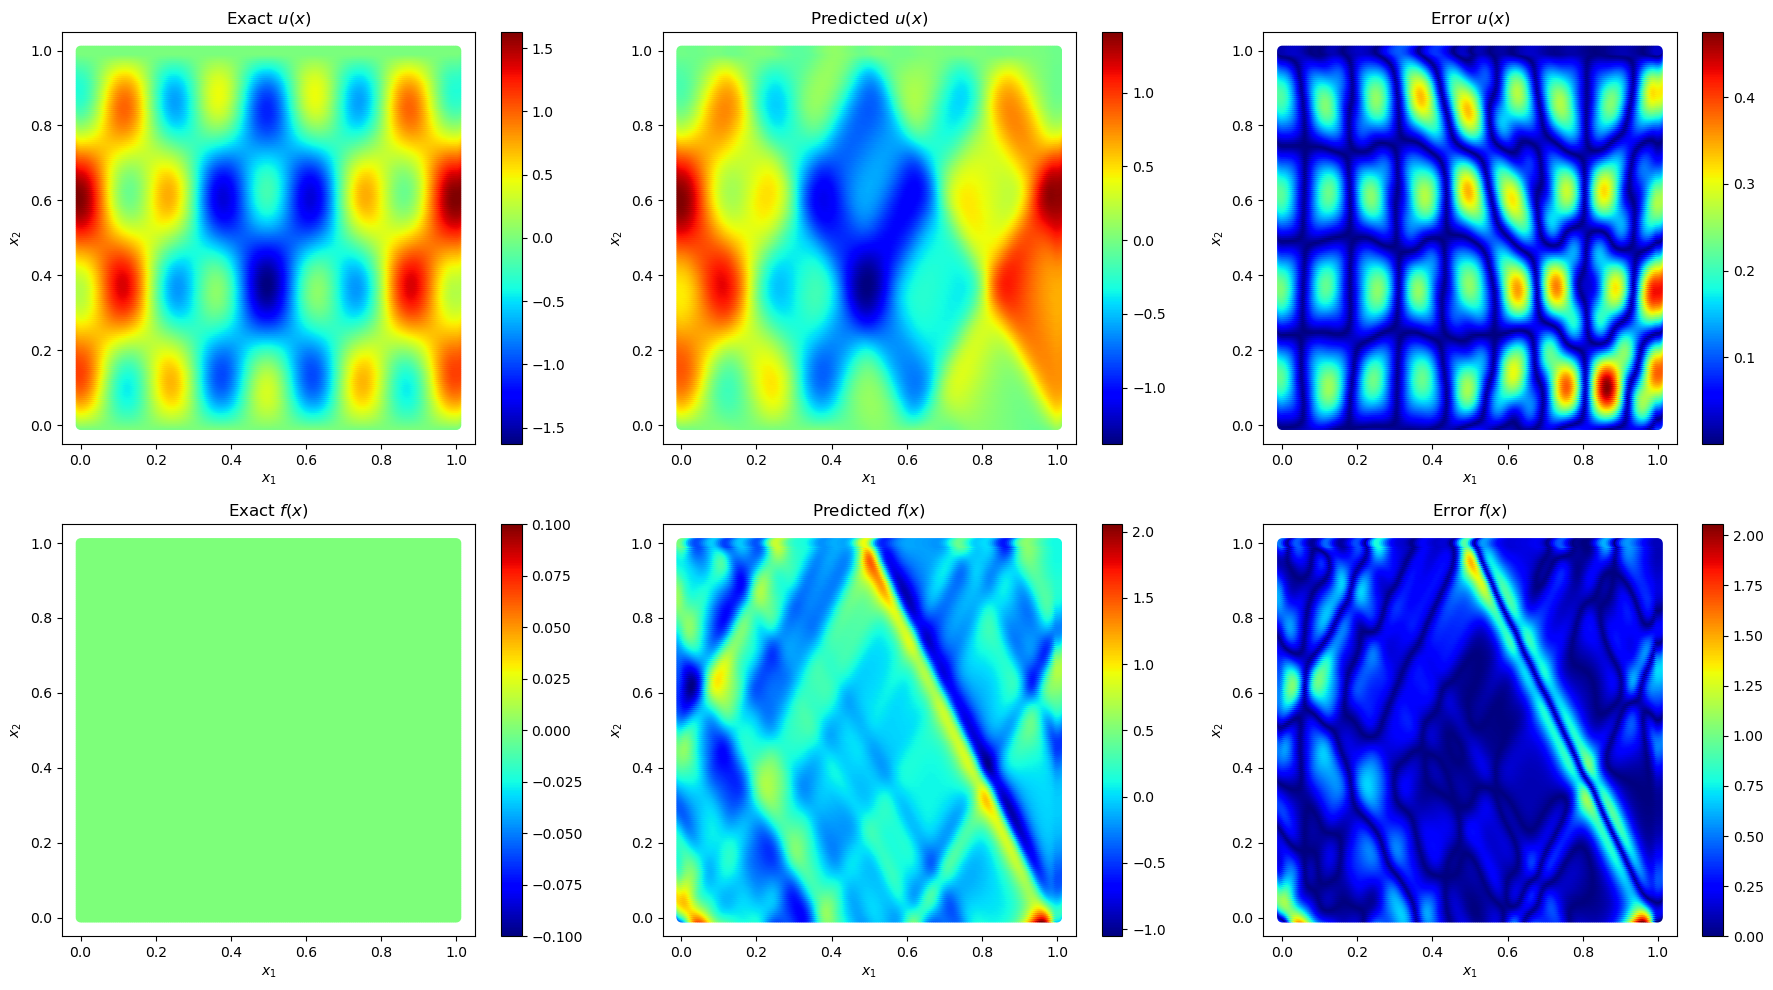

In [10]:

# Plot predictions
plt_prediction(
    logger,
    X,
    u_star,
    u_pred,
    f_star,
    f_pred,
)